# Fair Parameter Selection
This nootbook gives an overview of selecting parameters for the different models, such that they can be compared in a fair manner. 

In order to make a fair comparison of the three models, we must evaluate the models using the same number of free parameters. 

By setting a baseline for the $TensorTrain$ K-value, we can compute what the K's for the CP and GMM models should be.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import models as m

In [2]:
K_baseline = 10
M_DIM = 2

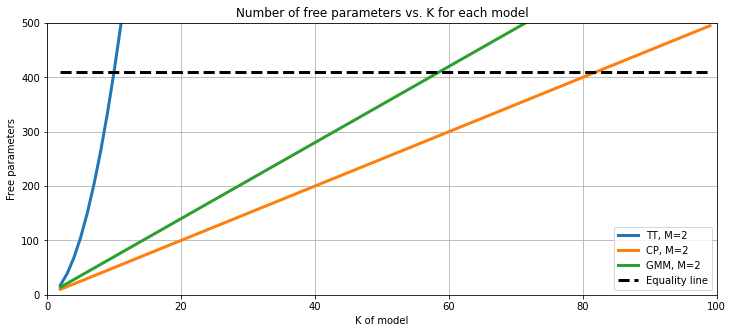

In [6]:
K_MAX = 100
Ks = np.arange(2, K_MAX, 1)
Ms = np.arange(2, 3, 1)
params = np.zeros((3, len(Ms), len(Ks)))
legends = []

# compute number of parameters for each model
for i, M in enumerate(Ms):
    for j, K in enumerate(Ks):
        model_Train = m.TensorTrainGaussian(K, M)
        model_CP = m.CPGaussian(K, M)
        params[0, i, j] = model_Train.n_parameters()
        params[1, i, j] = model_CP.n_parameters()
        params[2, i, j] = K + M*K + K*M*M
    legends.append('TT, M='+str(M))
    legends.append('CP, M='+str(M))
    legends.append('GMM, M='+str(M))
    
# Make a vertical line
val = params[0, Ms==M_DIM, Ks==K_baseline][0]
line = val*np.ones(Ks.shape)
legends.append('Equality line')

f,ax = plt.subplots(figsize=(10, 5))
for i in range(len(Ms)):
    ax.plot(Ks, params[:,i].T, linewidth=3)
ax.plot(Ks, line, '--k', linewidth=3)
ax.legend(legends)
ax.set_xlabel('K of model')
ax.set_ylabel('Free parameters')
ax.grid('on')
ax.set_title('Number of free parameters vs. K for each model')
ax.set_ylim([0, 500])
ax.set_xlim([0, K_MAX])
plt.show()

In [4]:
# Find indicies that achieve the same number of trainable parameters
idx_TT = np.argmax(params[0, Ms==M_DIM] >= val)
idx_CP = np.argmax(params[1, Ms==M_DIM] >= val)
idx_GMM = np.argmax(params[2, Ms==M_DIM] >= val)

# Number of components 
K_TT = Ks[idx_TT]
K_CP = Ks[idx_CP]
K_GMM = Ks[idx_GMM]

print('Selected number of components (K-values)')
print(f'TensorTrain : {K_TT}')
print(f'CP          : {K_CP}')
print(f'GMM(sklean) : {K_GMM}')

Selected number of components (K-values)
TensorTrain : 10
CP          : 82
GMM(sklean) : 59


## Method for getting fair K's

In [6]:
from utils import get_fair_Ks
Ks_tt = [10, 15, 20, 25, 30, 35, 40, 50, 75, 100]
M = 2
K_gmm, K_cp = get_fair_Ks(Ks_tt, M)
print(K_gmm)
print(K_cp)

[82, 183, 324, 505, 726, 987, 1288, 2010, 4515, 8020]
[59, 131, 232, 361, 519, 705, 920, 1436, 3225, 5729]
